In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv(r"data\nndb_flat.csv")
df_org = pd.read_csv(r'original\nndb_flat.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8618 non-null   int64  
 1   foodgroup         8618 non-null   object 
 2   shortdescrip      8618 non-null   object 
 3   descrip           8618 non-null   object 
 4   commonname        1063 non-null   object 
 5   mfgname           1560 non-null   object 
 6   scientificname    732 non-null    object 
 7   energy_kcal       8618 non-null   float64
 8   protein_g         8618 non-null   float64
 9   fat_g             8618 non-null   float64
 10  carb_g            8618 non-null   float64
 11  sugar_g           8618 non-null   float64
 12  fiber_g           8618 non-null   float64
 13  vita_mcg          8618 non-null   float64
 14  vitb6_mg          8618 non-null   float64
 15  vitb12_mcg        8618 non-null   float64
 16  vitc_mg           8618 non-null   float64


In [4]:
df.set_index('id', inplace=True)
cat_cols = df.iloc[:, :6]
num_cols = df.drop(cat_cols.columns.to_list() , axis='columns')
df = num_cols

<Figure size 1152x648 with 0 Axes>

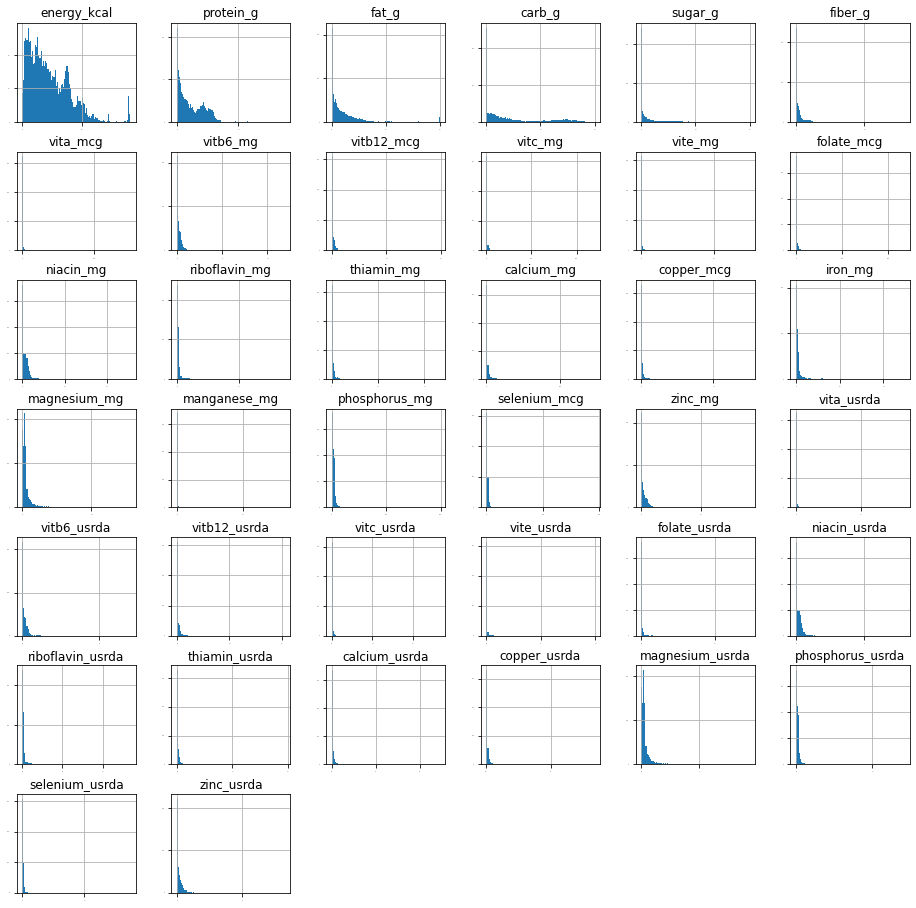

In [5]:
plt.figure(figsize=(16,9))
ax = df.hist(bins=100, xlabelsize=-1, ylabelsize=-1, figsize=(16,16))

In [6]:
from scipy.stats import boxcox
# add 1 because data must be positive (we have many zeros)
df = df + 1
df_TF = pd.DataFrame(index=df.index)
for i in df.columns.values:
    df_TF["%s_TF" % i] = boxcox(df.loc[:, i])[0]

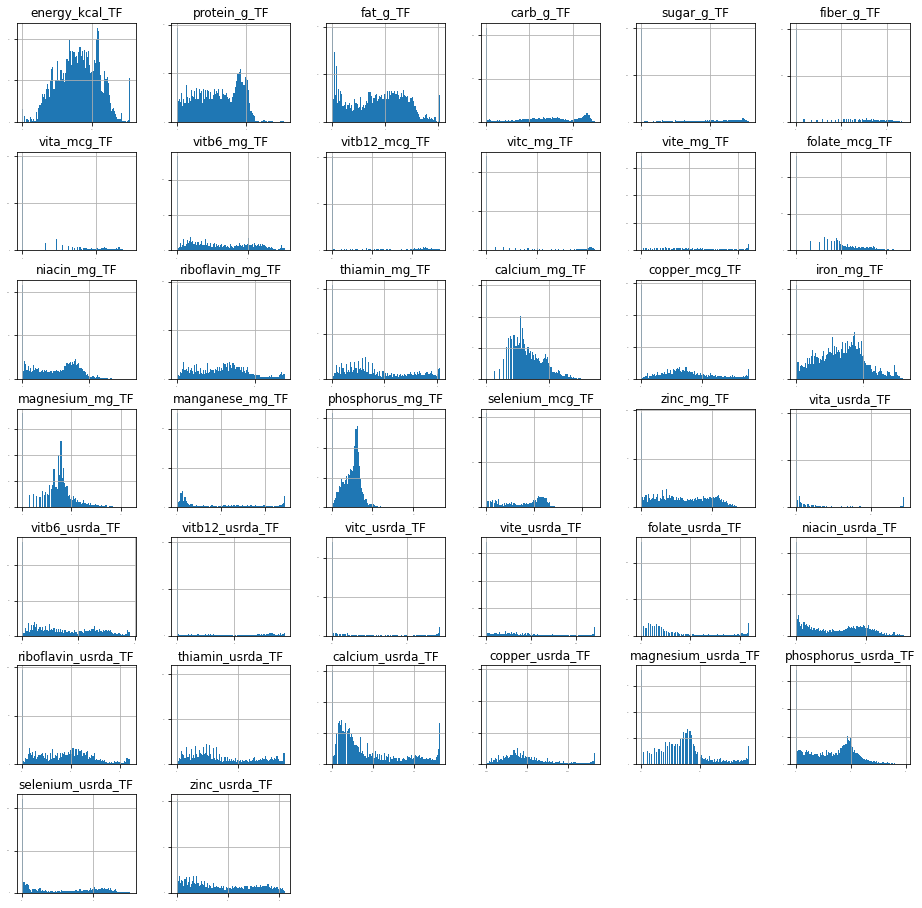

In [7]:
ax = df_TF.hist(bins=100, xlabelsize=-1, ylabelsize=-1, figsize=(16,16))

In [8]:
from sklearn.preprocessing import StandardScaler

df = StandardScaler().fit_transform(df)

In [15]:
#If we would want to do PCA manually then 

X_cov_mat = np.cov(df.T)

eig_vals, eig_vecs = np.linalg.eig(X_cov_mat)

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)


#Calculating cumulative eigen values to check the variance retention...
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print ("Variance captured by each component is \n",var_exp[:5])
print(40 * '-')
print ("Cumulative variance captured as we travel each component \n",cum_var_exp[:25])

Variance captured by each component is 
 [(25.970166250885264+0j), (10.828204483777117+0j), (9.019010687226922+0j), (7.716866234693291+0j), (6.2666988043217815+0j)]
----------------------------------------
Cumulative variance captured as we travel each component 
 [ 25.97016625+0.j  36.79837073+0.j  45.81738142+0.j  53.53424766+0.j
  59.80094646+0.j  65.30980216+0.j  69.89551683+0.j  74.17903495+0.j
  77.66912981+0.j  81.14731588+0.j  83.87143571+0.j  86.25585789+0.j
  88.56086514+0.j  90.62464538+0.j  92.33994132+0.j  93.84405576+0.j
  95.22460794+0.j  96.37319821+0.j  97.47400182+0.j  98.47083986+0.j
  99.31296202+0.j  99.99001126+0.j 100.        +0.j 100.        +0.j
 100.        +0.j]


In [10]:
from sklearn.decomposition import PCA

dec = PCA(n_components=20)

scdf = dec.fit_transform(df)

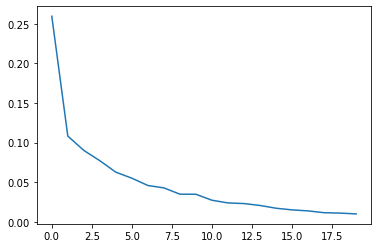

In [11]:
plt.plot(dec.explained_variance_ratio_)

In [12]:
np.round(pd.DataFrame(scdf).corr(),10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0
3,0.0,0.0,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,0.0,0.0
4,0.0,0.0,0.0,-0.0,1.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
5,-0.0,0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
6,-0.0,0.0,-0.0,0.0,0.0,-0.0,1.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0
7,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,1.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0
8,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,1.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0
9,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0
